In [95]:
# Import Libraries
import pandas as pd # Data Manipulation
import numpy as np # 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Import Excel data into pandas
greeks_data=pd.read_csv("greeks.csv")
greeks_data


,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [97]:
# Import train data
train_data= pd.read_csv("train.csv")
train_data= train_data.round(2)
train_data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.21,3109.03,85.20,22.39,8.14,0.70,0.03,9.81,5.56,...,7.30,1.74,0.09,11.34,72.61,2003.81,22.14,69.83,0.12,1
1,007255e47698,0.15,978.76,85.20,36.97,8.14,3.63,0.03,13.52,1.23,...,0.17,0.50,0.57,9.29,72.61,27981.56,29.14,32.13,21.98,0
2,013f2bd269f5,0.47,2635.11,85.20,32.36,8.14,6.73,0.03,12.82,1.23,...,7.71,0.98,1.20,37.08,88.61,13676.96,28.02,35.19,0.20,0
3,043ac50845d5,0.25,3819.65,120.20,77.11,8.14,3.69,0.03,11.05,1.23,...,6.12,0.50,0.28,18.53,82.42,2094.26,39.95,90.49,0.16,0
4,044fb8a146ec,0.38,3733.05,85.20,14.10,8.14,3.94,0.05,3.40,102.15,...,8.15,48.50,0.12,16.41,146.11,8524.37,45.38,36.26,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.15,3130.06,123.76,9.51,13.02,3.50,0.08,8.55,2.80,...,0.17,1.26,0.07,8.97,217.15,8095.93,24.64,69.19,21.98,0
613,fd895603f071,0.44,5462.03,85.20,46.55,15.97,5.98,0.03,12.62,3.78,...,10.22,1.24,0.43,35.90,496.99,3085.31,29.65,124.81,0.15,0
614,fd8ef6377f76,0.43,2459.11,130.14,55.36,10.01,8.07,0.03,15.41,1.23,...,0.17,0.50,0.07,19.96,128.90,6474.65,26.17,119.56,21.98,0
615,fe1942975e40,0.36,1263.54,85.20,23.69,8.14,7.98,0.03,7.52,1.23,...,9.26,0.79,0.67,24.59,72.61,1965.34,25.12,37.16,0.18,0


In [98]:
# Merging test data and greeks data to get all the attributes
data=pd.merge(train_data,greeks_data , how='inner')
data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.21,3109.03,85.20,22.39,8.14,0.70,0.03,9.81,5.56,...,2003.81,22.14,69.83,0.12,1,B,C,G,D,3/19/2019
1,007255e47698,0.15,978.76,85.20,36.97,8.14,3.63,0.03,13.52,1.23,...,27981.56,29.14,32.13,21.98,0,A,C,M,B,Unknown
2,013f2bd269f5,0.47,2635.11,85.20,32.36,8.14,6.73,0.03,12.82,1.23,...,13676.96,28.02,35.19,0.20,0,A,C,M,B,Unknown
3,043ac50845d5,0.25,3819.65,120.20,77.11,8.14,3.69,0.03,11.05,1.23,...,2094.26,39.95,90.49,0.16,0,A,C,M,B,Unknown
4,044fb8a146ec,0.38,3733.05,85.20,14.10,8.14,3.94,0.05,3.40,102.15,...,8524.37,45.38,36.26,0.10,1,D,B,F,B,3/25/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.15,3130.06,123.76,9.51,13.02,3.50,0.08,8.55,2.80,...,8095.93,24.64,69.19,21.98,0,A,B,M,B,9/13/2020
613,fd895603f071,0.44,5462.03,85.20,46.55,15.97,5.98,0.03,12.62,3.78,...,3085.31,29.65,124.81,0.15,0,A,B,M,B,9/8/2020
614,fd8ef6377f76,0.43,2459.11,130.14,55.36,10.01,8.07,0.03,15.41,1.23,...,6474.65,26.17,119.56,21.98,0,A,C,M,B,7/24/2019
615,fe1942975e40,0.36,1263.54,85.20,23.69,8.14,7.98,0.03,7.52,1.23,...,1965.34,25.12,37.16,0.18,0,A,C,M,B,1/31/2019


In [99]:
data.shape # display the shape of the data

(617, 63)

In [100]:
data.dtypes # display the data types of the attributes

Id          object
AB         float64
AF         float64
AH         float64
AM         float64
            ...   
Alpha       object
Beta        object
Gamma       object
Delta       object
Epsilon     object
Length: 63, dtype: object

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       617 non-null    object 
 1   AB       617 non-null    float64
 2   AF       617 non-null    float64
 3   AH       617 non-null    float64
 4   AM       617 non-null    float64
 5   AR       617 non-null    float64
 6   AX       617 non-null    float64
 7   AY       617 non-null    float64
 8   AZ       617 non-null    float64
 9   BC       617 non-null    float64
 10  BD       617 non-null    float64
 11  BN       617 non-null    float64
 12  BP       617 non-null    float64
 13  BQ       557 non-null    float64
 14  BR       617 non-null    float64
 15  BZ       617 non-null    float64
 16  CB       615 non-null    float64
 17  CC       614 non-null    float64
 18  CD       617 non-null    float64
 19  CF       617 non-null    float64
 20  CH       617 non-null    float64
 21  CL       617 non

In [102]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477196,3502.012950,118.624506,38.968622,10.129238,5.545575,0.063404,10.566872,8.053096,5350.388493,...,5.432078,3.534652,0.422228,20.724862,131.714327,14679.595122,31.489919,50.584311,8.531656,0.175041
std,0.468481,2300.322759,127.838882,69.728384,10.518445,2.551590,0.416742,4.350082,65.166756,3021.326729,...,11.496607,50.182020,1.305354,9.991997,144.181678,19352.959482,9.864329,36.266154,10.328017,0.380310
min,0.080000,192.590000,85.200000,3.180000,8.140000,0.700000,0.030000,3.400000,1.230000,1693.620000,...,0.170000,0.500000,0.070000,4.100000,72.610000,13.040000,9.430000,0.900000,0.000000,0.000000
25%,0.250000,2197.350000,85.200000,12.270000,8.140000,4.130000,0.030000,8.130000,1.230000,4155.700000,...,0.170000,0.500000,0.070000,14.040000,72.610000,2798.990000,25.030000,23.010000,0.120000,0.000000
50%,0.350000,3120.320000,85.200000,20.530000,8.140000,5.030000,0.030000,10.460000,1.230000,4997.960000,...,3.030000,1.130000,0.250000,18.770000,72.610000,7838.270000,30.610000,41.010000,0.340000,0.000000
75%,0.560000,4361.640000,113.740000,39.140000,8.140000,6.430000,0.040000,12.970000,5.080000,6035.890000,...,6.240000,1.510000,0.540000,25.610000,127.590000,19035.710000,36.860000,67.930000,21.980000,0.000000
max,6.160000,28688.190000,1910.120000,630.520000,178.940000,38.270000,10.320000,38.970000,1463.690000,53060.600000,...,137.930000,1244.230000,31.370000,135.780000,1497.350000,143790.070000,81.210000,191.190000,21.980000,1.000000


In [103]:
# Checking duplicate values
print('Sum of duplicate values:{}\n'.format(data.duplicated().sum()))

Sum of duplicate values:0



In [104]:
# checking the null values in the data columns
print('Sum of null values: {}'.format(data.isna().sum()))

Sum of null values: Id         0
AB         0
AF         0
AH         0
AM         0
          ..
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
Length: 63, dtype: int64


In [105]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [106]:
data['Alpha'].value_counts()

A    509
B     61
G     29
D     18
Name: Alpha, dtype: int64

In [107]:
data['Beta'].value_counts()

C    407
B    202
A      8
Name: Beta, dtype: int64

In [108]:
data['Gamma'].value_counts()

M    445
N     64
H     53
B     18
A     11
F     10
G      8
E      8
Name: Gamma, dtype: int64

In [109]:
data['Delta'].value_counts()

B    456
A     75
C     64
D     22
Name: Delta, dtype: int64

In [110]:
data['Epsilon'].value_counts()

Unknown       144
5/29/2019      24
6/26/2019      19
9/15/2020      17
8/29/2019      13
             ... 
2/21/2019       1
8/13/2019       1
5/18/2020       1
12/20/2019      1
7/24/2019       1
Name: Epsilon, Length: 198, dtype: int64

In [111]:
m=[col for col in data.columns if data[col].isna().sum()!=0]
print(m)

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']


In [112]:
data['BQ'].value_counts()

344.64    39
33.72      2
39.20      2
64.12      2
26.16      2
          ..
4.93       1
93.53      1
63.56      1
11.95      1
6.09       1
Name: BQ, Length: 508, dtype: int64

In [113]:
# Replaced the na with median as the attributes are distributed either left or right skewed.
data['BQ'] = data['BQ'].fillna(data['BQ'].median()) 
data['CB'] = data['CB'].fillna(data['CB'].median())
data['CC'] = data['CC'].fillna(data['CC'].median())
data['DU'] = data['DU'].fillna(data['DU'].median())
data['EL'] = data['EL'].fillna(data['EL'].median())
data['FC'] = data['FC'].fillna(data['FC'].median())
data['FL'] = data['FL'].fillna(data['FL'].median())
data['FS'] = data['FS'].fillna(data['FS'].median())
data['GL'] = data['GL'].fillna(data['GL'].median())

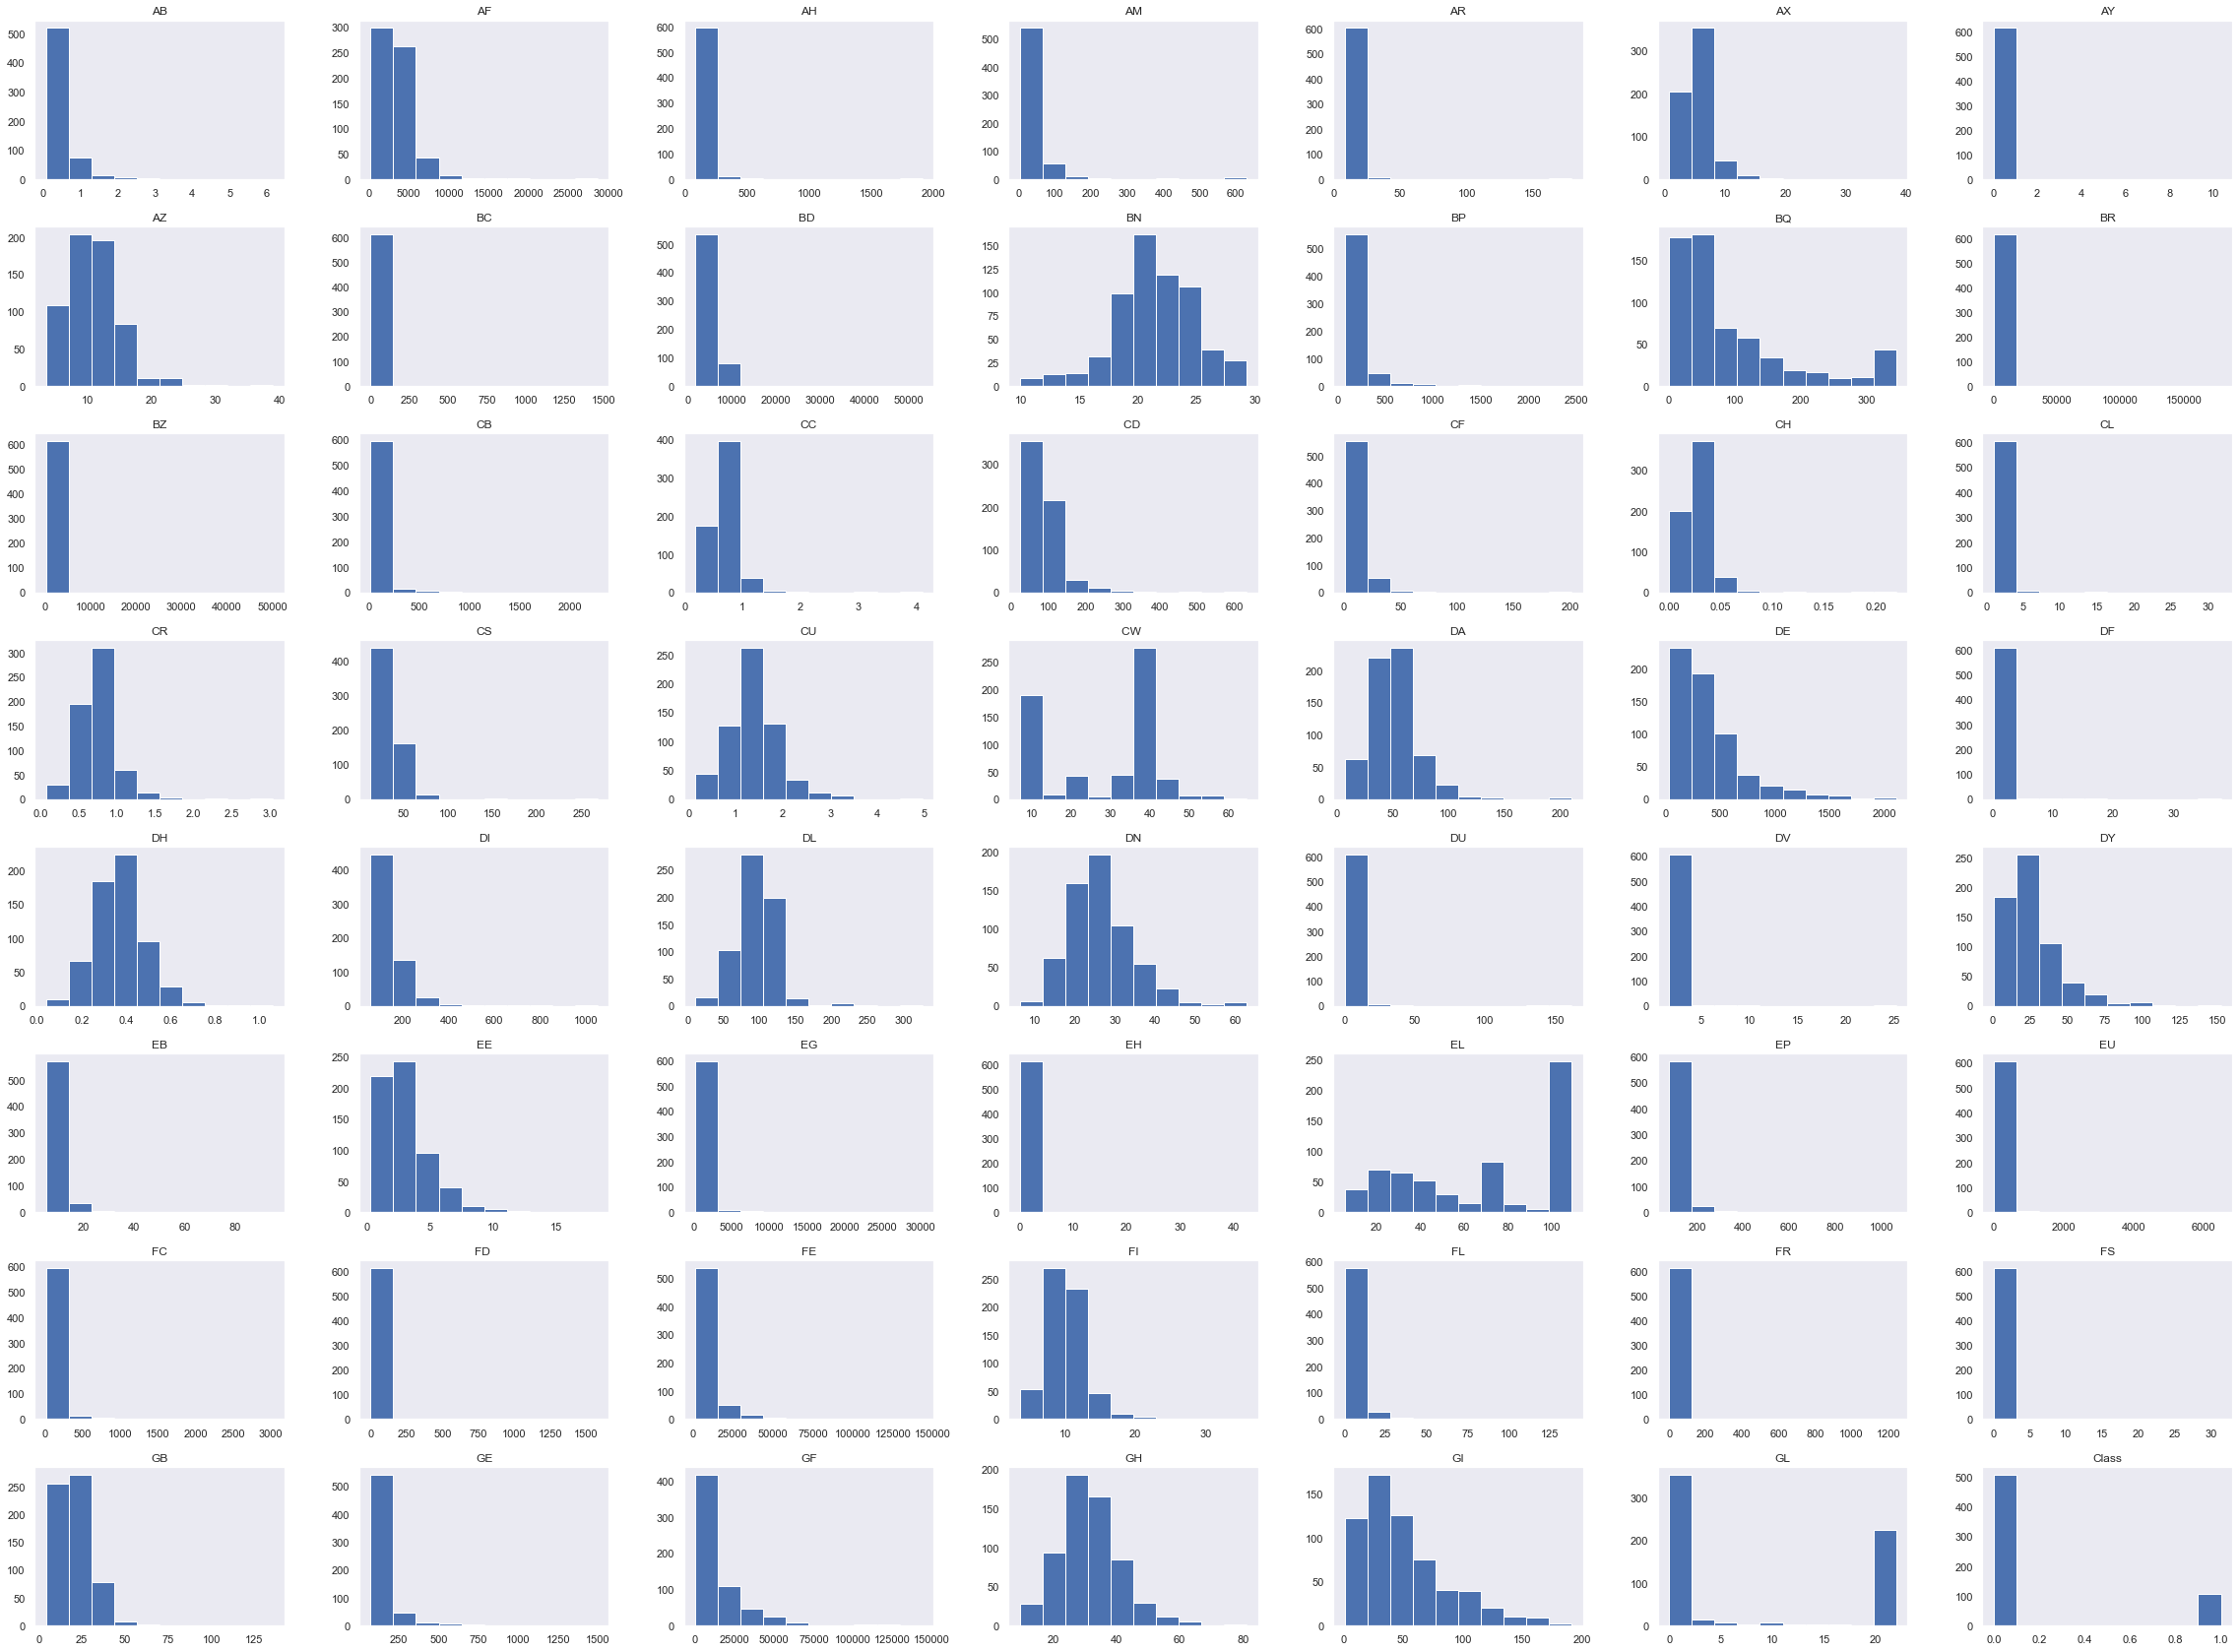

In [114]:
# let's visualize the distribution of the features
data.hist(figsize=(40,30),bins=10, grid=False)
plt.show()

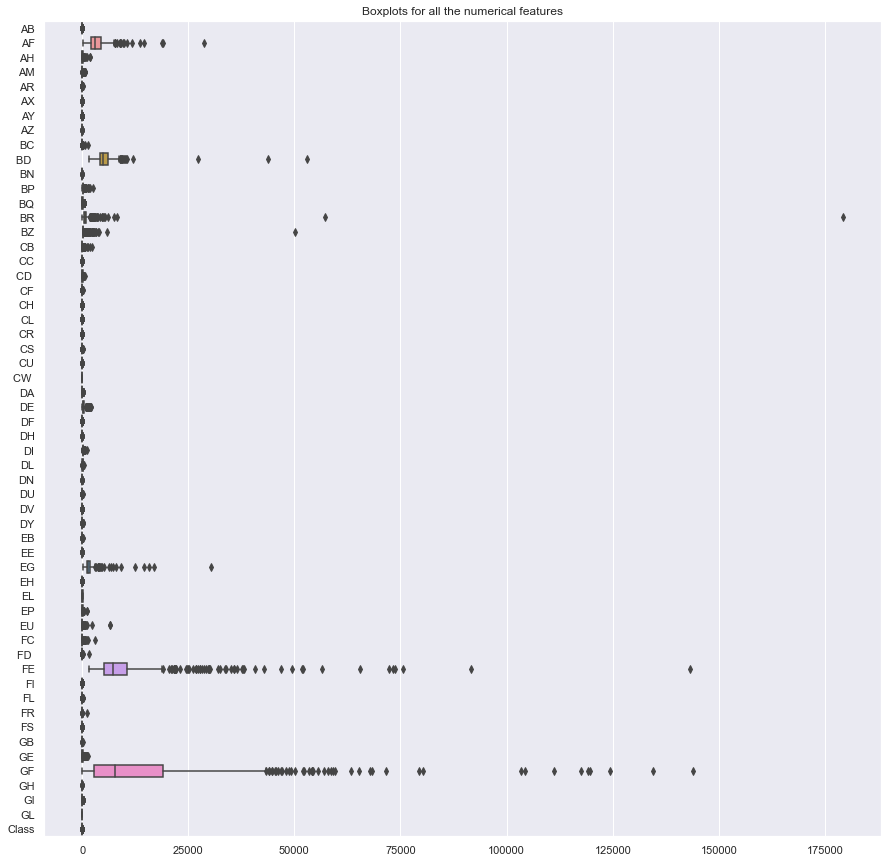

In [117]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data, orient="h")
sns.set(rc={"figure.figsize":(15, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()

In [119]:
# FE, GF, EG, BR, BZ, BD, AF with outliers

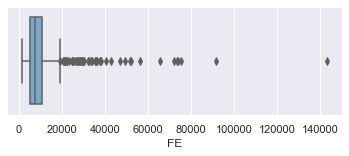

In [126]:
sns.boxplot(data = data, x = 'FE', palette="Blues")
sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


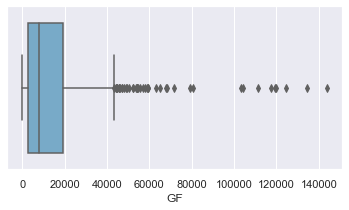

In [127]:

sns.boxplot(data = data, x = 'GF', palette="Blues")
sns.set(rc={"figure.figsize":(6, 4)})
# Display
plt.show()

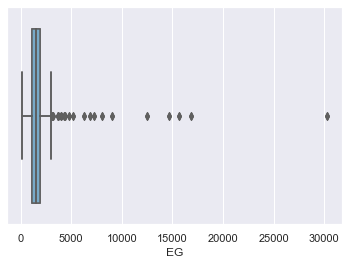

In [128]:
sns.boxplot(data = data, x = 'EG')
sns.boxplot(data = data, x = 'EG', palette="Blues")
sns.set(rc={"figure.figsize":(6, 4)})
# Display
plt.show()

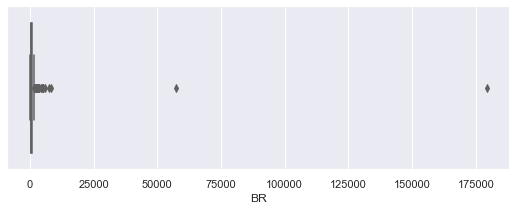

In [132]:
sns.boxplot(data = data, x = 'BR', palette="Blues")
sns.set(rc={"figure.figsize":(9,5)})
# Display
plt.show()


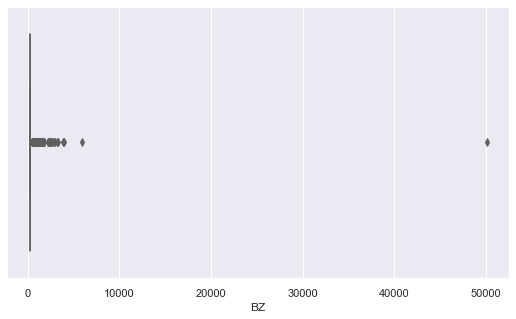

In [133]:
sns.boxplot(data = data, x = 'BZ', palette="Blues")
sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


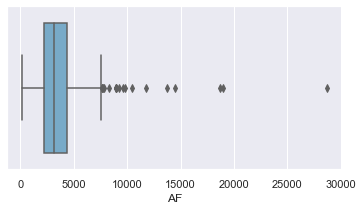

In [137]:
sns.boxplot(data = data, x = 'AF', palette="Blues")
sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


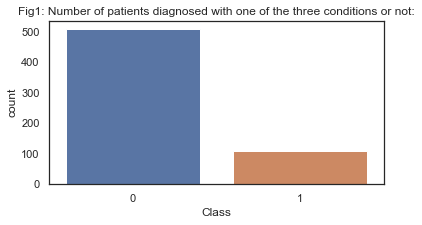

In [138]:
sns.set_style("white")
sns.countplot(data['Class'])
plt.title("Fig1: Number of patients diagnosed with one of the three conditions or not:" )
plt.show()

In [139]:
data.to_excel("EDA_results.xlsx", index=False)